In [10]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [3]:
df = pd.read_csv('../../Data/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
df["date"] = pd.to_datetime({"year":df["year"],"month":df["month"],"day":1})
df.set_index("date",inplace=True)
df.index.freq = pd.infer_freq(df.index)
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


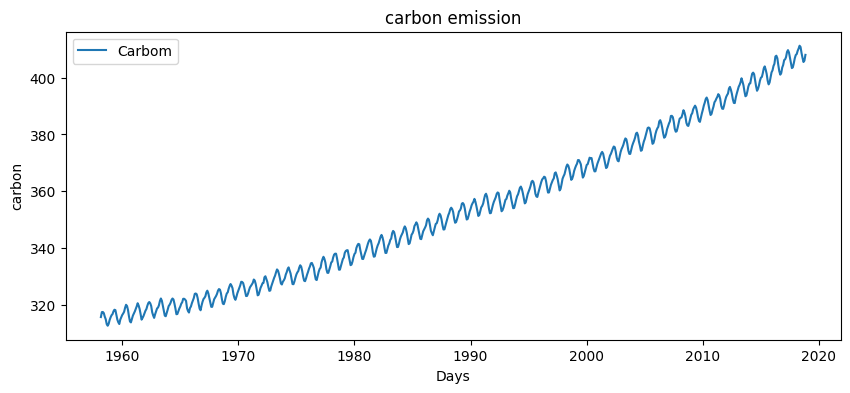

In [13]:
plt.figure(figsize=(10, 4))

# Plotting three separate line graphs
plt.plot(df.index, df["interpolated"], label='Carbom')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('carbon')
plt.title('carbon emission')

plt.legend()
plt.show()

In [14]:
# Set one year for testing
train = df.iloc[:717]
test = df.iloc[717:]

In [16]:
auto = auto_arima(
    df["interpolated"],
    m=12,
    seasonal=True,
    trace=True, 
)

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=460.866, Time=17.56 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2369.532, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1614.808, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2375.248, Time=0.09 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1101.952, Time=3.48 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=770.620, Time=3.72 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=498.481, Time=10.37 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=538.433, Time=30.83 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1440.918, Time=1.75 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=9.62 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=611.747, Time=8.10 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=35.76 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=456.005, Time=5.02 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1491.576, Time=1.08 sec
 ARIMA(1,1,2

In [17]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.687
Date:                              Sat, 30 Mar 2024   AIC                            423.375
Time:                                      16:23:05   BIC                            450.917
Sample:                                  03-01-1958   HQIC                           434.002
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3544      0.035    -10.094      0.000      -0.423      -0.286
ma.L2         -0.0228      0.020     -1.132      0.258      -0.062       0.017
ma.L3         -0.0857      0.031     -2.786      0.005      -0.146      -0.025
ar.S.L12       0.9996      0.000   2972.289      0.000       0.999       1.000
ma.S.L12      -0.8673      0.021    -40.833      0.000      -0.909      -0.826
sigma2         0.0955      0.005     20.355      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 4.06
Prob(Q):                              0.76   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
model = SARIMAX(train["interpolated"] , order=(0,1,3) , seasonal_order=(1,0,1,12)).fit()
model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17036D+00    |proj g|=  7.04673D-01

At iterate    5    f=  3.17640D-01    |proj g|=  4.51847D-01

At iterate   10    f=  2.89552D-01    |proj g|=  1.79109D-03

At iterate   15    f=  2.89300D-01    |proj g|=  1.46155D-02

At iterate   20    f=  2.83950D-01    |proj g|=  3.74335D-02

At iterate   25    f=  2.80663D-01    |proj g|=  8.88020D-03

At iterate   30    f=  2.80600D-01    |proj g|=  2.11977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.190
Date:                              Sat, 30 Mar 2024   AIC                            414.381
Time:                                      16:26:13   BIC                            441.823
Sample:                                  03-01-1958   HQIC                           424.978
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3543      0.036     -9.939      0.000      -0.424      -0.284
ma.L2         -0.0242      0.037     -0.662      0.508      -0.096       0.047
ma.L3         -0.0869      0.035     -2.501      0.012      -0.155      -0.019
ar.S.L12       0.9997      0.000   3114.873      0.000       0.999       1.000
ma.S.L12      -0.8667      0.022    -38.581      0.000      -0.911      -0.823
sigma2         0.0949      0.005     20.328      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.39
Prob(Q):                              0.78   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
start=len(train)
end=len(train)+len(test)-1
predictions = model.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , root_mean_squared_error

mae = mean_absolute_error(test["interpolated"], predictions)
msq = mean_squared_error(test["interpolated"], predictions)
rmse = root_mean_squared_error(test["interpolated"], predictions)

In [25]:
print("MSA=",mae)
print("MSQ=",msq)
print("RMSE=",rmse)

MSA= 0.27535483061793303
MSQ= 0.12804893556610997
RMSE= 0.35783925939744227


In [27]:
smape = np.mean((np.abs(test['interpolated'] - predictions) /((np.abs(test['interpolated'] +np.abs(predictions)) / 2)))) * 100
       
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.4f}")

Symmetric Mean Absolute Percentage Error (SMAPE): 0.0673
